In [1]:
# My Modules
import sys
sys.path.append('../')
from src.utils import *
from src import datahandler, modeltrainer

###### Data tools
from math import sqrt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###### Preprocessing tools
from sklearn.utils import all_estimators
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

##### Measuring models
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

#from sklearn.ensemble import *
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier

In [2]:
ENV = 'local'

if ENV == 'local':
    # Local Jupyter Setup
    PATH='../'
    
    #makesound()

In [3]:
data = pd.read_csv('../OUTPUT/numfeats_qd.csv')
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,depth_categories
0,1.21,0,4,3.6,63.0,57.0,6.73,6.70,4.23,6134,0.2
1,0.28,2,0,2.5,64.0,56.0,4.14,4.17,2.66,532,0.2
2,0.42,1,2,3.1,61.2,58.0,4.86,4.82,2.96,1103,0.0
3,0.26,0,4,0.0,61.1,57.0,4.16,4.12,2.53,600,0.0
4,1.10,3,3,6.0,63.4,57.0,6.52,6.55,4.14,4997,0.2


# Preparing variables `X` and `y`

In [4]:
Xunprocessed = data.drop(columns='price')
y = data.price

### Quick Visualization

In [5]:
visualize = False
if visualize:
    columns = Xunprocessed.columns   # Use this variable to specify the features to visaualize.
    datahandler.visualize_data(Xunprocessed[columns],y)

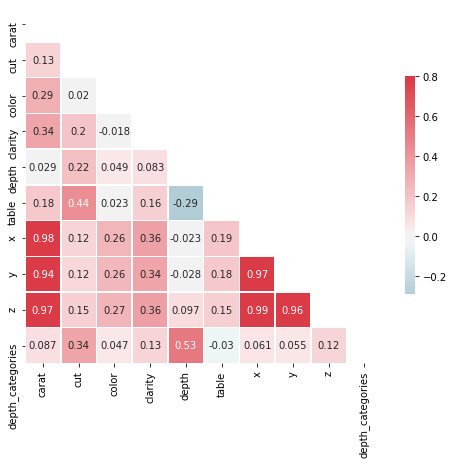

In [6]:
datahandler.corr_matrix(Xunprocessed)

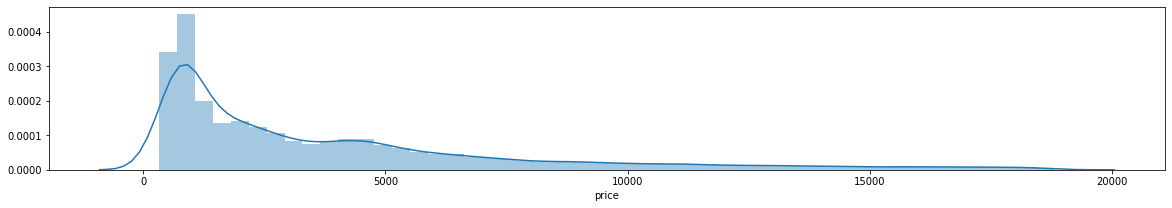

In [7]:
plt.figure(figsize=(20,3))
sns.distplot(y)

# Pre-processing data pipeline

`sklearn estimators`
![sklearn estimators](https://scikit-learn.org/stable/_static/ml_map.png)


Links to more documentation: 
 - [`sklearn.pipeline`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline)
 - `Estimator class`
     - `myestimator.get_params`

In [8]:

# Feeling lucky?
Lucky = True
# We could check all possible estimators in the sklearn library:
if Lucky: display(all_estimators(type_filter='regressor'))


[('ARDRegression', sklearn.linear_model._bayes.ARDRegression),
 ('AdaBoostRegressor', sklearn.ensemble._weight_boosting.AdaBoostRegressor),
 ('BaggingRegressor', sklearn.ensemble._bagging.BaggingRegressor),
 ('BayesianRidge', sklearn.linear_model._bayes.BayesianRidge),
 ('CCA', sklearn.cross_decomposition._cca.CCA),
 ('DecisionTreeRegressor', sklearn.tree._classes.DecisionTreeRegressor),
 ('DummyRegressor', sklearn.dummy.DummyRegressor),
 ('ElasticNet', sklearn.linear_model._coordinate_descent.ElasticNet),
 ('ElasticNetCV', sklearn.linear_model._coordinate_descent.ElasticNetCV),
 ('ExtraTreeRegressor', sklearn.tree._classes.ExtraTreeRegressor),
 ('ExtraTreesRegressor', sklearn.ensemble._forest.ExtraTreesRegressor),
 ('GaussianProcessRegressor',
  sklearn.gaussian_process._gpr.GaussianProcessRegressor),
 ('GradientBoostingRegressor', sklearn.ensemble._gb.GradientBoostingRegressor),
 ('HistGradientBoostingRegressor',
  sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradie

In [9]:
pipelineA = [    StandardScaler()]
pipelineB = [    StandardScaler(),    Normalizer(),]

tr = make_pipeline(*pipelineA)

# We'll use this transformation pipeline for our training, testing, and final predictions
Xprocessed = tr.fit_transform(Xunprocessed)

In [10]:
pd.DataFrame(Xprocessed).head(2)

,0,1,2,3,4,5,6,7,8,9
0,0.880093,-0.982962,0.833658,-0.395673,0.877395,-0.205924,0.897395,0.844339,1.001745,1.021044
1,-1.095267,0.809998,-1.525915,-0.977066,1.579543,-0.653290,-1.417842,-1.358400,-1.261634,1.021044


## Train, test, split

Starting from `Xprocessed`, create 2 groups of X and y 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(Xprocessed, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32276, 10) (8069, 10) (32276,) (8069,)


# Define my models and make a first `cross_val_score` if needed.

Here, consider loading a trained model, using pickle and [this guide](https://scikit-learn.org/stable/modules/model_persistence.html):

In [12]:
#I have defined them in this module
models = modeltrainer.models
models.keys()

dict_keys(['BayesianRidge', 'HuberRegressor', 'KNeighborsRegressor', 'LassoCV', 'Lars', 'MultiTaskElasticNet', 'MultiTaskLasso', 'MLPRegressor', 'TheilSenRegressor'])

In [ ]:
# Flip this logic switch to test all the available models in the `modeltrainer` module
recheck_models = True

if recheck_models:
    # Configure the cross_val_score parameters here
    verbose = 3
    cv = 10
    for name, model in models.items():
        try:
            print(f"{'-'*100}\nModel: ({name})")
            scores = cross_val_score(model, Xunprocessed, y,
                                     cv=cv,   verbose=verbose,
                                     scoring='neg_mean_squared_error')
            MSE = abs(np.mean(scores))
            print(f"   Xunprocessed    MSE={MSE}      \t RMSE={sqrt(MSE)}")
            scores = cross_val_score(model, Xprocessed, y,
                                     cv=cv, verbose=verbose,
                                     scoring='neg_mean_squared_error',
                                     )
            MSE = abs(np.mean(scores))
            print(f"   Xprocessed      MSE={MSE}      \t RMSE={sqrt(MSE)}")
        except Exception as e:
            print(f"{'+'*100}\n     {e}")
        
makesound('coin')

----------------------------------------------------------------------------------------------------
Model: (BayesianRidge)
[CV]  ................................................................
[CV] ............................. , score=-1262237.574, total=   0.0s
[CV]  ................................................................
[CV] ............................. , score=-1376409.824, total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ............................. , score=-1387767.782, total=   0.1s
[CV]  ................................................................
[CV] ............................. , score=-1375445.533, total=   0.1s
[CV]  ................................................................
[CV] ............................. , score=-1463543.279, total=   0.1s
[CV]  ................................................................
[CV] ............................. , score=-1421768.959, total=   0.1s
[CV]  ................................................................
[CV] ............................. , score=-1363010.655, total=   0.1s
[CV]  ................................................................
[CV] ............................. , score=-1533514.779, total=   0.1s
[CV]  ................................................................
[CV] ............................. , score=-2013305.469, total=   0.1s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ............................. , score=-1376412.578, total=   0.0s
[CV]  ................................................................
[CV] ............................. , score=-1387776.537, total=   0.1s
[CV]  ................................................................
[CV] ............................. , score=-1375446.519, total=   0.1s
[CV]  ................................................................
[CV] ............................. , score=-1463540.556, total=   0.1s
[CV]  ................................................................
[CV] ............................. , score=-1421764.692, total=   0.1s
[CV]  ................................................................
[CV] ............................. , score=-1363008.381, total=   0.1s
[CV]  ................................................................
[CV] ............................. , score=-1533516.137, total=   0.0s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/rh/.local/lib/python3.6/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ............................. , score=-1415219.386, total=   1.2s
[CV]  ................................................................


/home/rh/.local/lib/python3.6/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV] ............................. , score=-1631549.135, total=   1.2s
[CV]  ................................................................


/home/rh/.local/lib/python3.6/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] ............................. , score=-1708573.358, total=   1.1s
[CV]  ................................................................


/home/rh/.local/lib/python3.6/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] ............................. , score=-1585948.753, total=   1.3s
[CV]  ................................................................


In [ ]:
makesound('coin')

In [ ]:
break

# 🔢️  Grid-Search Cross-Validation ♨️

Select a model, and set up a parametrs_grid. Iterate over all the possible mixes of parameters, and save the fitted model 

#### Also consider using `RandomizedSearchCV`

In [ ]:
# Select my model
my_model = models['HistGradientBoostingRegressor']
#my_model.get_params()

In [ ]:
parameters_grid = {#'loss':['ls', 'lad'],
                  'n_estimators':[1100],
                  'learning_rate':[0.1],
                 # 'max_bins':[255],
                 # 'max_iter':[86,87,88],
                  'max_leaf_nodes':[20],
                 # 'scoring':['neg_root_mean_squared_error'],
                   'criterion':['mse'], #'friedman_mse'
                  'random_state':[1]
                  }

# Fit my model with GridSearchCV (By using X_train and y_train, we are leveraging on the Xprocessed data we have defined above)

In [ ]:
reg = GridSearchCV(my_model, parameters_grid, verbose=50,
                   n_jobs=1,     # How many CPU cores to use
                   cv=3,
                   scoring='neg_mean_squared_error'
                  ).fit(X_train, y_train)
makesound()

    This is my best estimator model, according to the crossvalidation process we just ran!

In [ ]:
reg.best_estimator_

In [ ]:
reg.best_params_

# Compare the GROUND TRUTH with our predicted `ŷ_test`

#### I can use my fitted model to predict any given set of X values
 In this case, I want to predict the section of my `train_data` which my model has never seen (the `X_test`)

In [ ]:
my_pred = reg.predict(X_test)
my_pred.shape

## Measure RMSE

In [ ]:
RMSE = sqrt(mean_squared_error(y_test,  my_pred))
print(f'Current score: {RMSE}    \n  Highest score: {modeltrainer.highest_score}')

if RMSE < modeltrainer.highest_score:
    new_high_score()


    # #############################################################################
    # Plot feature importance
    feature_importance = reg.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, boston.feature_names[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

In [ ]:
reg_refit = reg.fit(Xunprocessed, y)

In [ ]:
reg.best_params_

In [ ]:
break

# Train again the model, but using all the X data, before sending a prediction to kaggle

In [ ]:
reg = GridSearchCV(my_model, parameters_grid, verbose=10,
                   scoring='neg_mean_squared_error'
                  ).fit(Xunprocessed, y)
makesound()

In [ ]:
makesound()

# Take this new regression model, and use it to predict the values of `y` in the kaggle dataset

In [ ]:
X_competition = pd.read_csv(f'../INPUT/diamonds_test.csv')#.drop(columns='Unnamed: 0')
X_competition.head(3)

In [ ]:
# Remove outlier prices:
#X_competition = X_competition[X_competition.price < 10000]

### Reuse my data processing pipeline to make this `test data` look like the data I fitted my model with


In [ ]:
X_competition_processed = datahandler.use_my_numeric_scales(X_competition)
X_competition_processed['depth_categories'] = X_competition_processed.depth
X_competition_processed['depth_categories'] = X_competition_processed.depth_categories.apply(datahandler.depth_qualifyer)
X_competition_processed.drop(columns="Unnamed: 0", inplace=True)
X_competition_processed.head(3)

In [ ]:
reg.best_estimator_

In [ ]:
my_prediction = reg.predict(X_competition_processed)

In [ ]:
df = pd.DataFrame(my_prediction)
df = df.reset_index()
df.columns = ['id', 'price']
df.head()

In [ ]:
df.shape

In [ ]:
df.to_csv(f'../OUTPUT/my_prediction.csv', columns=['id','price'], index_label=False,index=False)

In [ ]:
break

# Predict using all the `train data`

### Calculate accracy scores for my GridSearchCV's top_model, and compare it with other trained models in my dict

In [ ]:
"""
TODO: scoring of cross validation score
"""

In [ ]:
scores = cross_val_score(reg, Xunprocessed, y, cv=10, verbose=2, scoring='neg_mean_squared_error')
print(f"   Xunprocessed   RMSE: {sqrt(np.mean(abs(scores)))}   MSE={np.mean(abs(scores))}    -- ")

In [ ]:
# RMSE
sqrt(abs(scores).mean())

In [ ]:
scores = cross_val_score(top_model, Xprocessed, y, cv=10,  verbose=2, scoring='neg_mean_squared_error')
print(f"   Xprocessed     RMSE: {sqrt(np.mean(scores))}   MSE={np.mean(scores)}   <-- ")

In [ ]:
sqrt(abs(scores).mean())

# How do I cross_val_score the correct data ? 


In [ ]:
for name, model in models.items():
    print(f"({name})")
    scores = cross_val_score(model, Xunprocessed, y, cv=10, scoring='neg_mean_squared_error')
    print(f"   X    acccuracy={np.mean(scores)}")
    #scores = cross_val_score(model, Xprocessed, y, cv=10, scoring='neg_mean_squared_error')
    #print(f"   Xpr  acccuracy={np.mean(scores)}")

# Prepare for our Final Prediction

Guessing the sale price of the unlabeled diamonds, using our `top_model`, fitting it to all of `X`, and finally using its `predict_` method on the `X_competition`

    # Choose the correct columns to fit the model
    def select_features(dataframe):
        data = dataframe.copy()
        data.drop(columns='price', inplace=True)
        my_features = data.columns
        return my_features
    my_features = select_features(data_input_states['numeric_train'])
    my_features